# Experiment of Determining the Number of Hidden Layers #

## Motivation ##

https://www.heatonresearch.com/2017/06/01/hidden-layers.html

Rule-of-thumb methods:

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.

## Dataset ##

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./data/hour_preprocessed.csv')

In [4]:
data.dtypes

temp                   float64
humidity               float64
windspeed              float64
hour                     int64
weekday                  int64
month                    int64
year                     int64
season_1               float64
season_2               float64
season_3               float64
season_4               float64
is_holiday_0           float64
is_holiday_1           float64
weather_condition_1    float64
weather_condition_2    float64
weather_condition_3    float64
weather_condition_4    float64
is_workingday_0        float64
is_workingday_1        float64
total_count              int64
dtype: object

In [5]:
data.head(n=10)

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1,total_count
0,0.24,0.81,0.0000,0,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,16
1,0.22,0.80,0.0000,1,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40
2,0.22,0.80,0.0000,2,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,32
3,0.24,0.75,0.0000,3,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13
4,0.24,0.75,0.0000,4,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
5,0.24,0.75,0.0896,5,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
6,0.22,0.80,0.0000,6,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
7,0.20,0.86,0.0000,7,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
8,0.24,0.75,0.0000,8,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8
9,0.32,0.76,0.0000,9,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,14


In [6]:
SIZE_INPUT = 19
SIZE_OUTPUT = 1

SIZE_RULE_2 = int(2/3 * (SIZE_INPUT + SIZE_OUTPUT))

MIN_SIZE = SIZE_OUTPUT + 1
MAX_SIZE = 2 * SIZE_INPUT

print('Hidden layer size were recommended being btw {} and {}'.format(MIN_SIZE, MAX_SIZE))

Hidden layer size were recommended being btw 2 and 38


## Split Train and Test data ##

In [7]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [8]:
X.shape

(17379, 19)

In [9]:
y.shape

(17379,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
test_size=0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

## Build model ##

In [13]:
from utils.nn import create_mlp_nn
from sklearn import metrics

In [17]:
dnn = create_mlp_nn(hidden_layer_sizes=(160, 80, 40), verbose=False)
dnn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(160, 80, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
print("R-squared::{}".format(dnn.score(X_train, y_train)))
print("Pred R-squared::{}".format(dnn.score(X_test, y_test)))
print("MSE::{}".format(metrics.mean_squared_error(y_test, dnn.predict(X_test))))

R-squared::0.9106457314393288
Pred R-squared::0.9002130472935612
MSE::3336.8798909376187


## Test size of hidden layers ##

I use `predict-r2` and `MSE` as the evaluating measure.

### Experiment 1: 2 hidden layers, later one has 2/3 size of input + output ###

In [24]:
pred_history = []
for size1 in range(MIN_SIZE, MAX_SIZE + 1):
    # Use 2 layers
    hls = (size1, SIZE_RULE_2)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, MAX_SIZE, r2, mse))

Done 2/38. Result: R2=0.5901009090145379, MSE=13707.042823993768
Done 3/38. Result: R2=0.5912882249884386, MSE=13667.338927942812
Done 4/38. Result: R2=0.6808065542541837, MSE=10673.842236286422
Done 5/38. Result: R2=0.771016468959812, MSE=7657.218898464167
Done 6/38. Result: R2=0.6675587028726213, MSE=11116.85094307914
Done 7/38. Result: R2=0.8649887396751468, MSE=4514.782217606256
Done 8/38. Result: R2=0.7780391099175178, MSE=7422.381489790288
Done 9/38. Result: R2=0.7096397200185008, MSE=9709.659961735282
Done 10/38. Result: R2=0.6718424110075263, MSE=10973.603563072833
Done 11/38. Result: R2=0.6905200937472437, MSE=10349.02106753528
Done 12/38. Result: R2=0.7480536141777407, MSE=8425.097727134618
Done 13/38. Result: R2=0.6262425938966737, MSE=12498.46336308373
Done 14/38. Result: R2=0.595873176562977, MSE=13514.017954658766
Done 15/38. Result: R2=0.6401821230987452, MSE=12032.324920913134
Done 16/38. Result: R2=0.80805949646165, MSE=6418.498502482416
Done 17/38. Result: R2=0.684270

In [19]:
from matplotlib import pyplot as plt
import seaborn as sn

/Users/magicii/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [54]:
hist_df = pd.DataFrame(data={'x': [ins['size'][0] for ins in pred_history],
                             'r2': [ins['score'] for ins in pred_history],
                             'mse': [ins['mse'] for ins in pred_history]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex1.csv', index=False)

/Users/magicii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


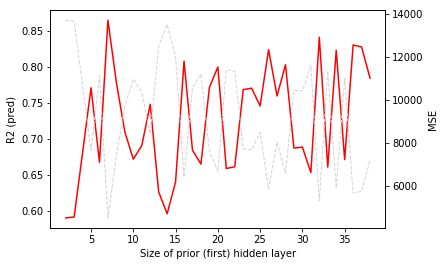

In [48]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_xlabel('Size of prior (first) hidden layer')
ax1.set_ylabel('R2 (pred)')

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylabel('MSE')

plt.show()

### Experiment 2: 2 hidden layers, prior one has 2/3 size of input + output ###

In [41]:
pred_history_2 = []
for size2 in range(MIN_SIZE, MAX_SIZE + 1):
    # Use 2 layers
    hls = (SIZE_RULE_2, size2)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_2.append({'size': hls, 
                           'score': r2,
                           'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size2, MAX_SIZE, r2, mse))

Done 2/38. Result: R2=0.597726767099166, MSE=13452.03380925213


/Users/magicii/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done 3/38. Result: R2=-0.5545705833092343, MSE=51984.90561935985
Done 4/38. Result: R2=0.6757013826319742, MSE=10844.559389821032
Done 5/38. Result: R2=0.6589927330252379, MSE=11403.29733466503
Done 6/38. Result: R2=0.5370971660120396, MSE=15479.490216888744
Done 7/38. Result: R2=0.6581344786342473, MSE=11431.997397558329
Done 8/38. Result: R2=0.6932853249207368, MSE=10256.551620915654
Done 9/38. Result: R2=0.6812038597524555, MSE=10660.556323731877
Done 10/38. Result: R2=0.8491573347440565, MSE=5044.185063640227
Done 11/38. Result: R2=0.6708353558417472, MSE=11007.279530126752
Done 12/38. Result: R2=0.579291931251354, MSE=14068.495494521432
Done 13/38. Result: R2=0.6262425938966737, MSE=12498.46336308373
Done 14/38. Result: R2=0.7537920976045108, MSE=8233.202600247634
Done 15/38. Result: R2=0.7699708585911119, MSE=7692.184153123613
Done 16/38. Result: R2=0.6711227728076832, MSE=10997.668294710364
Done 17/38. Result: R2=0.7985993558535814, MSE=6734.846001873173
Done 18/38. Result: R2=0

In [55]:
hist_df = pd.DataFrame(data={'x': [ins['size'][1] for ins in pred_history_2],
                             'r2': [ins['score'] for ins in pred_history_2],
                             'mse': [ins['mse'] for ins in pred_history_2]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex2.csv', index=False)

/Users/magicii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


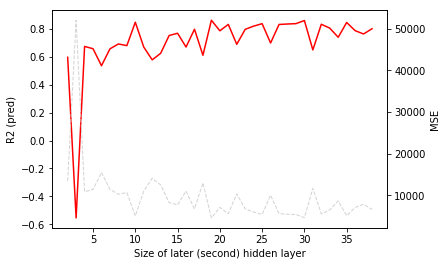

In [50]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_xlabel('Size of later (second) hidden layer')
ax1.set_ylabel('R2 (pred)')

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylabel('MSE')

plt.show()

/Users/magicii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


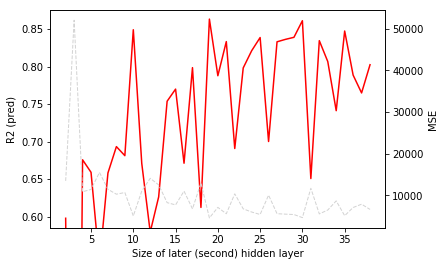

In [53]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_xlabel('Size of later (second) hidden layer')
ax1.set_ylabel('R2 (pred)')
ax1.set_ylim((0.585, 0.875))

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylabel('MSE')

plt.show()

## Experiment 3: ##

In [57]:
pred_history_3 = []
size_from = MAX_SIZE
size_to = 4 * SIZE_INPUT
for size1 in range(size_from, size_to + 1):
    # Use 2 layers
    hls = (size1, SIZE_RULE_2)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_3.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, size_to, r2, mse))

Done 38/76. Result: R2=0.7845585202587639, MSE=7204.372134073467
Done 39/76. Result: R2=0.7776147612266703, MSE=7436.5717278407465
Done 40/76. Result: R2=0.7993805617795176, MSE=6708.722442888404
Done 41/76. Result: R2=0.6862703493337141, MSE=10491.132699271842
Done 42/76. Result: R2=0.7708253641196195, MSE=7663.609452349252
Done 43/76. Result: R2=0.7532845694056916, MSE=8250.174364539364
Done 44/76. Result: R2=0.6875770097166654, MSE=10447.437921168117
Done 45/76. Result: R2=0.7892874807719447, MSE=7046.235495830856
Done 46/76. Result: R2=0.8005669275701242, MSE=6669.050321006716
Done 47/76. Result: R2=0.7874696350783152, MSE=7107.024332200523
Done 48/76. Result: R2=0.6594609190818479, MSE=11387.641173261693
Done 49/76. Result: R2=0.6816042200201919, MSE=10647.168259558093
Done 50/76. Result: R2=0.6778055095518141, MSE=10774.19729721911
Done 51/76. Result: R2=0.8015199213037442, MSE=6637.182170515529
Done 52/76. Result: R2=0.8168755171527825, MSE=6123.690400175944
Done 53/76. Result: 

In [58]:
hist_df = pd.DataFrame(data={'x': [ins['size'][0] for ins in pred_history_3],
                             'r2': [ins['score'] for ins in pred_history_3],
                             'mse': [ins['mse'] for ins in pred_history_3]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex3.csv', index=False)

/Users/magicii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


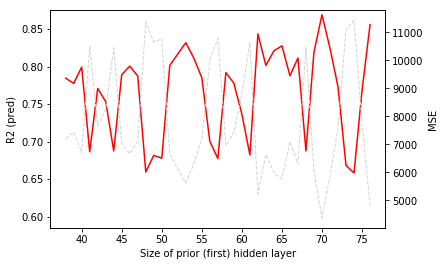

In [60]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_xlabel('Size of prior (first) hidden layer')
ax1.set_ylabel('R2 (pred)')
ax1.set_ylim((0.585, 0.875))

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylabel('MSE')

plt.show()

## Experiment 4: ##

In [61]:
pred_history_4 = []
size_from = MAX_SIZE
size_to = 4 * SIZE_INPUT
for size1 in range(size_from, size_to + 1):
    # Use 2 layers
    hls = (SIZE_RULE_2, size1)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_4.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, size_to, r2, mse))

Done 38/76. Result: R2=0.8024854699326237, MSE=6604.894183799381
Done 39/76. Result: R2=0.8010447299438253, MSE=6653.072589555836
Done 40/76. Result: R2=0.8180116171853546, MSE=6085.6991673548
Done 41/76. Result: R2=0.7622617217907373, MSE=7949.978011618681
Done 42/76. Result: R2=0.8061825145841295, MSE=6481.264855325936
Done 43/76. Result: R2=0.8363278853090361, MSE=5473.2023917619
Done 44/76. Result: R2=0.6550470930664846, MSE=11535.239700657277
Done 45/76. Result: R2=0.8074373570438711, MSE=6439.302870751414
Done 46/76. Result: R2=0.8294528626292725, MSE=5703.103439019385
Done 47/76. Result: R2=0.7907780595844425, MSE=6996.390477715973
Done 48/76. Result: R2=0.8462061250030318, MSE=5142.873641371785
Done 49/76. Result: R2=0.8365202025452361, MSE=5466.771295303385
Done 50/76. Result: R2=0.794806817336294, MSE=6861.6686492304225
Done 51/76. Result: R2=0.8398743796838066, MSE=5354.607470867684
Done 52/76. Result: R2=0.8567933357851836, MSE=4788.836868007116
Done 53/76. Result: R2=0.682

In [62]:
hist_df = pd.DataFrame(data={'x': [ins['size'][1] for ins in pred_history_4],
                             'r2': [ins['score'] for ins in pred_history_4],
                             'mse': [ins['mse'] for ins in pred_history_4]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex4.csv', index=False)

/Users/magicii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


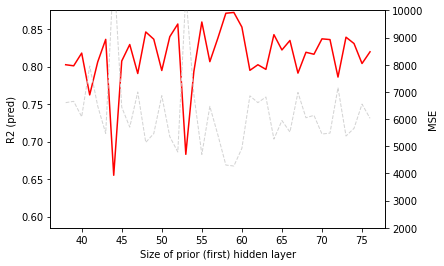

In [64]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_xlabel('Size of prior (first) hidden layer')
ax1.set_ylabel('R2 (pred)')
ax1.set_ylim((0.585, 0.875))

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylim((2000, 10000))
ax2.set_ylabel('MSE')

plt.show()

## Experiment 5 ##

Suggested by **Irfan Majid**

`N = 2 * input + 1`

In [65]:
pred_history_5 = []
size_from = SIZE_INPUT * 2 - 5
size_to = SIZE_INPUT * 2 + 5
for size1 in range(size_from, size_to + 1):
    # Use 2 layers
    hls = (size1, size1)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_5.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, size_to, r2, mse))

Done 33/43. Result: R2=0.7990835930119107, MSE=6718.653090953978
Done 34/43. Result: R2=0.8306949688983607, MSE=5661.567353195406
Done 35/43. Result: R2=0.8146723764614189, MSE=6197.363517457575
Done 36/43. Result: R2=0.8717098380516471, MSE=4290.028405516851
Done 37/43. Result: R2=0.834059840647208, MSE=5549.045900542732
Done 38/43. Result: R2=0.81906819692561, MSE=6050.367096449677
Done 39/43. Result: R2=0.8059170944433484, MSE=6490.140515984977
Done 40/43. Result: R2=0.8558455435127615, MSE=4820.5310814173135
Done 41/43. Result: R2=0.8074279468635334, MSE=6439.617547577264
Done 42/43. Result: R2=0.8208421537027955, MSE=5991.045907289836
Done 43/43. Result: R2=0.8655609745264561, MSE=4495.646660136688


In [67]:
hist_df = pd.DataFrame(data={'x': [ins['size'][1] for ins in pred_history_5],
                             'r2': [ins['score'] for ins in pred_history_5],
                             'mse': [ins['mse'] for ins in pred_history_5]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex5.csv', index=False)

/Users/magicii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


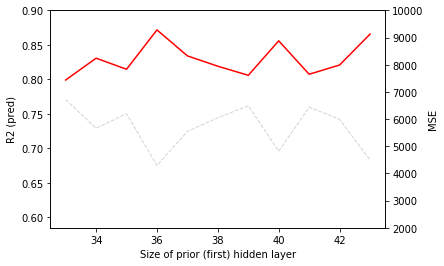

In [70]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_xlabel('Size of prior (first) hidden layer')
ax1.set_ylabel('R2 (pred)')
ax1.set_ylim((0.585, 0.90))

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylim((2000, 10000))
ax2.set_ylabel('MSE')

plt.show()

## Experiment 6 ##

Suggested by **Irfan Majid**

`N = (4 * n^2) + 3 / (n^2-8)`

In [16]:
pred_history_6 = []
size_from = int((4 * SIZE_INPUT**2 + 3) / (SIZE_INPUT**2 - 8))
size_to = int((4 * SIZE_INPUT**2 + 3) / (SIZE_INPUT**2 - 8)) + 5
for size1 in range(size_from, size_to + 1):
    # Use 2 layers
    hls = (size1, size1)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_6.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, size_to, r2, mse))

Done 4/9. Result: R2=0.5837717897098922, MSE=13918.688839451803
Done 5/9. Result: R2=0.6719665970901193, MSE=10969.450775253388
Done 6/9. Result: R2=0.6799932859189458, MSE=10701.03796358531
Done 7/9. Result: R2=0.7229823265772918, MSE=9263.48263783501
Done 8/9. Result: R2=0.569611967948221, MSE=14392.193874070748
Done 9/9. Result: R2=0.6455173234117508, MSE=11853.91559829391


In [17]:
hist_df = pd.DataFrame(data={'x': [ins['size'][1] for ins in pred_history_6],
                             'r2': [ins['score'] for ins in pred_history_6],
                             'mse': [ins['mse'] for ins in pred_history_6]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex6.csv', index=False)

/Users/magicii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


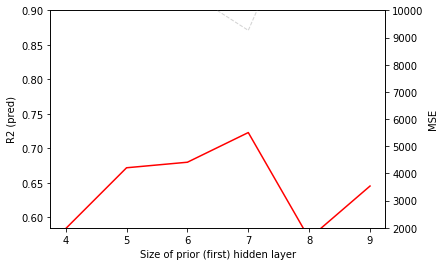

In [20]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_xlabel('Size of prior (first) hidden layer')
ax1.set_ylabel('R2 (pred)')
ax1.set_ylim((0.585, 0.90))

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylim((2000, 10000))
ax2.set_ylabel('MSE')

plt.show()

## Experiment 7A: 3 hidden layers ##

Keep N = `2*n + 1`. However increase the number of layers

In [21]:
pred_history_7 = []
VAR = 5
size_from = SIZE_INPUT * 2 + 1 - VAR
size_to = SIZE_INPUT * 2 + 1 + VAR
for size1 in range(size_from, size_to + 1):
    # Use 2 layers
    hls = (size1, size1, size1)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_7.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, size_to, r2, mse))

Done 33/43. Result: R2=0.8683326920674839, MSE=4402.960309114181
Done 34/43. Result: R2=0.8620748836130221, MSE=4612.221686746025
Done 35/43. Result: R2=0.8473568750318932, MSE=5104.3925120592185
Done 36/43. Result: R2=0.802323574403309, MSE=6610.307977101515
Done 37/43. Result: R2=0.8593889537045761, MSE=4702.039295730721
Done 38/43. Result: R2=0.8381689199586382, MSE=5411.638115730249
Done 39/43. Result: R2=0.8633329558870836, MSE=4570.151697044945
Done 40/43. Result: R2=0.8388282375744913, MSE=5389.590506955651
Done 41/43. Result: R2=0.873757179226411, MSE=4221.565230616055
Done 42/43. Result: R2=0.8375368292412595, MSE=5432.77525587596
Done 43/43. Result: R2=0.8789868928311652, MSE=4046.683387952663


In [22]:
hist_df = pd.DataFrame(data={'x': [ins['size'][1] for ins in pred_history_7],
                             'r2': [ins['score'] for ins in pred_history_7],
                             'mse': [ins['mse'] for ins in pred_history_7]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex7.csv', index=False)

## Experiment 7B: 4 hidden layers ##

In [23]:
pred_history_7B = []
VAR = 5
size_from = SIZE_INPUT * 2 + 1 - VAR
size_to = SIZE_INPUT * 2 + 1 + VAR
for size1 in range(size_from, size_to + 1):
    # Use 2 layers
    hls = (size1, size1, size1, size1)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_7B.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, size_to, r2, mse))

Done 34/44. Result: R2=0.8648187372798158, MSE=4520.46710484858
Done 35/44. Result: R2=0.8571889190541914, MSE=4775.608546871519
Done 36/44. Result: R2=0.8865801842351388, MSE=3792.763404380356
Done 37/44. Result: R2=0.6141468188463268, MSE=12902.946588957439
Done 38/44. Result: R2=0.8717659895497494, MSE=4288.150697061173
Done 39/44. Result: R2=0.8523860675688846, MSE=4936.216102326476
Done 40/44. Result: R2=0.8597244364789922, MSE=4690.820737659325
Done 41/44. Result: R2=0.8573187345670791, MSE=4771.267510666499
Done 42/44. Result: R2=0.8189811872062627, MSE=6053.276705120265
Done 43/44. Result: R2=0.8701210086435407, MSE=4343.158927676772
Done 44/44. Result: R2=0.8712034527400072, MSE=4306.961951613289


In [24]:
hist_df = pd.DataFrame(data={'x': [ins['size'][1] for ins in pred_history_7B],
                             'r2': [ins['score'] for ins in pred_history_7B],
                             'mse': [ins['mse'] for ins in pred_history_7B]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex7B.csv', index=False)

## Experiment 7C: 5 hidden layers ##

In [25]:
pred_history_7C = []
VAR = 5
size_from = SIZE_INPUT * 2 + 1 - VAR
size_to = SIZE_INPUT * 2 + 1 + VAR
for size1 in range(size_from, size_to + 1):
    # Use 2 layers
    hls = (size1, size1, size1, size1, size1)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_7C.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, size_to, r2, mse))

Done 34/44. Result: R2=0.8915679239108901, MSE=3625.973180069075
Done 35/44. Result: R2=0.8658869001214883, MSE=4484.747694545418
Done 36/44. Result: R2=0.8826773637722162, MSE=3923.2738846330158
Done 37/44. Result: R2=0.8337619230015598, MSE=5559.008279129872
Done 38/44. Result: R2=0.8850090019941951, MSE=3845.3038045289354
Done 39/44. Result: R2=0.8841419290448879, MSE=3874.2987603828474
Done 40/44. Result: R2=0.896122381698003, MSE=3473.671920317703
Done 41/44. Result: R2=0.8617587289951816, MSE=4622.793910449487
Done 42/44. Result: R2=0.8787722492094039, MSE=4053.8610796823637
Done 43/44. Result: R2=0.8395119371420787, MSE=5366.727564690675
Done 44/44. Result: R2=0.8823842538273946, MSE=3933.0754935025257


In [26]:
hist_df = pd.DataFrame(data={'x': [ins['size'][1] for ins in pred_history_7C],
                             'r2': [ins['score'] for ins in pred_history_7C],
                             'mse': [ins['mse'] for ins in pred_history_7C]})

# Store the result to compare later
hist_df.to_csv('./output/output_ex7C.csv', index=False)

In [ ]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_xlabel('Size of prior (first) hidden layer')
ax1.set_ylabel('R2 (pred)')
ax1.set_ylim((0.585, 0.90))

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylim((2000, 10000))
ax2.set_ylabel('MSE')

plt.show()

## Experiment 7D: 6 hidden layers ##

In [27]:
pred_history_7D = []
VAR = 5
size_from = SIZE_INPUT * 2 + 1 - VAR
size_to = SIZE_INPUT * 2 + 1 + VAR
for size1 in range(size_from, size_to + 1):
    # Use 2 layers
    hls = (size1, size1, size1, size1, size1, size1)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_7D.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, size_to, r2, mse))

Done 34/44. Result: R2=0.8650381772834602, MSE=4513.129021907192
Done 35/44. Result: R2=0.8291758746014174, MSE=5712.365930308196
Done 36/44. Result: R2=0.8058881467998517, MSE=6491.108526399712
Done 37/44. Result: R2=0.8555803118076429, MSE=4829.400440779886
Done 38/44. Result: R2=0.8567550108992731, MSE=4790.118453802133
Done 39/44. Result: R2=0.8847319233573188, MSE=3854.5693257872226
Done 40/44. Result: R2=0.8628152730350171, MSE=4587.463033367901
Done 41/44. Result: R2=0.8858716924921126, MSE=3816.4553980336236
Done 42/44. Result: R2=0.6577754311979029, MSE=11444.003958914653
Done 43/44. Result: R2=0.8847363519639285, MSE=3854.421232996125
Done 44/44. Result: R2=0.8926952105395263, MSE=3588.276667845829
